# PDEFIND Feature Overview

This notebook provides a simple overview of the PDE functionality of PySINDy.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dynamicslab/pysindy/v0.13.0?filepath=example%2Ffeature_overview.ipynb)

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
from scipy.io import loadmat
import pysindy as ps

(512, 201) (201,) (512,)


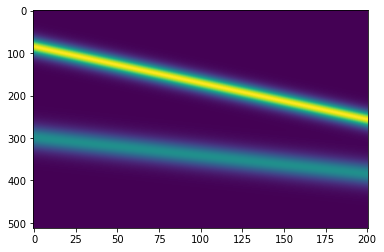

In [2]:
kdV = loadmat('data/kdv.mat')
t = np.ravel(kdV['t'])
x = np.ravel(kdV['x'])
u = np.abs(kdV['usol'])
print(np.shape(u), np.shape(t), np.shape(x))
plt.imshow(np.abs(u), aspect='auto')

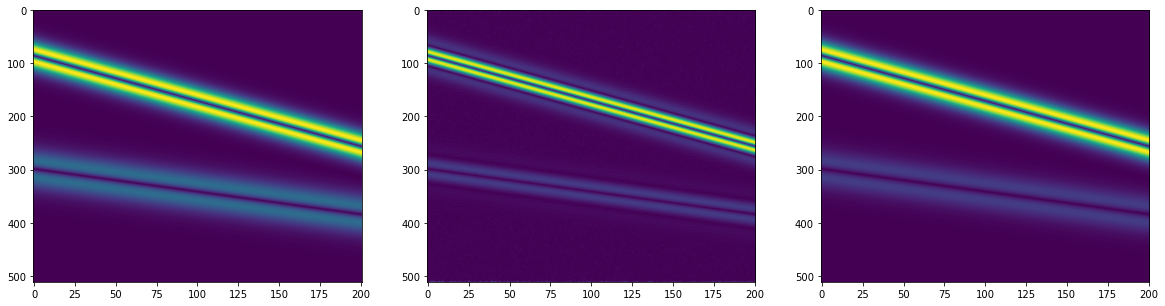

In [3]:
ux = np.zeros((len(x), len(t), 1))
uxxx = np.zeros((len(x), len(t), 1))
ut = np.zeros((len(x), len(t), 1))
for i in range(len(t)):
    u_temp = np.reshape(u[:, i], (len(u[:, i]), 1))
    ux[:, i] = ps.FiniteDifference()._differentiate(u_temp, x)
for i in range(len(t)):
    u_temp = np.reshape(u[:, i], (len(u[:, i]), 1))
    uxxx[:, i] = ps.FiniteDifference(d=3)._differentiate(u_temp, x)
for i in range(len(x)):
    u_temp = np.reshape(u[i, :], (len(u[i, :]), 1))
    ut[i, :] = ps.FiniteDifference()._differentiate(u_temp, t)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(ux), aspect='auto')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(uxxx), aspect='auto')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(ut), aspect='auto')

In [7]:
u_flattened = np.reshape(u, (len(x) * len(t), 1))
ut_flattened = np.reshape(ut, (len(x) * len(t), 1))
library_functions = [lambda x: x]
pde_lib = ps.PDELibrary(library_functions=library_functions, derivative_order=3, spatial_grid=x)
stlsq_optimizer = ps.STLSQ(threshold=0, alpha=.05)
model = ps.SINDy(feature_library=pde_lib, optimizer=stlsq_optimizer)
model.fit(u_flattened)  #, x_dot=ut_flattened)
print(pde_lib.get_feature_names())
model.print()
print(stlsq_optimizer.coef_)

['f0(x0)']
x0' = 0.000
[[-1.62232021e-04 -1.62676993e-02  1.55592942e-03 -7.09801191e-01
  -5.06599221e-01 -4.71233387e-03  5.96476036e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


(102912, 1, 3)


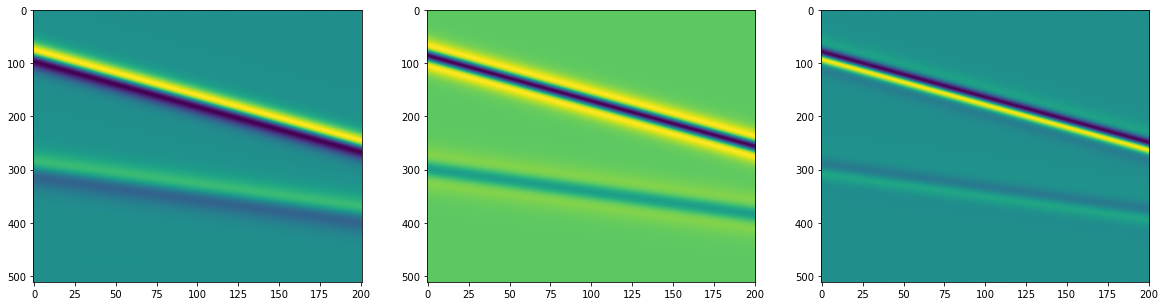

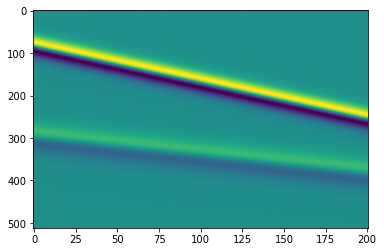

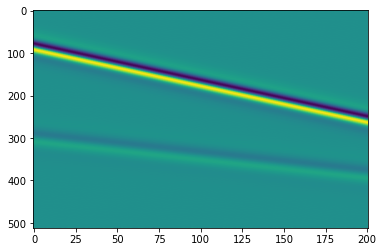

In [5]:
print(np.shape(pde_lib.u_derivs))
plt.figure(figsize=(20, 5))
pde_lib.u_derivs = np.reshape(pde_lib.u_derivs, (len(x), len(t), 1, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(pde_lib.u_derivs[:, :, :, i], aspect='auto')

plt.figure()
plt.imshow(ux, aspect='auto')
plt.figure()
plt.imshow(uxxx, aspect='auto')
#print(pde_lib.u_derivs[:, :, :, 2], uxxx)

In [6]:
# Predict derivatives using the learned model
x_dot_test_predicted = model.predict(u_flattened)  

ValueError: could not broadcast input array from shape (512,3) into shape (102912)